# Sums of squares

Source: [PennState Stat 501](https://newonlinecourses.science.psu.edu/stat501/node/263/)

"Is there a (linear) relationship between skin cancer mortality and latitude?"

Review the following scatter plot and estimated regression line. What does the plot suggest is the answer to the research question? The linear relationship looks fairly strong. The estimated slope is negative, not equal to 0

## Upload data

In [ ]:
from GoogleDrivePy.google_authentification import connect_service_local
from GoogleDrivePy.google_drive import connect_drive
import pandas as pd
import numpy as np
import os
import re
pathcredential = '/Users/Thomas/Google Drive/Projects/Data_science/Google_code_n_Oauth/Client_Oauth/Google_auth/'
scopes = ['https://www.googleapis.com/auth/documents.readonly',
            'https://www.googleapis.com/auth/drive', 
         'https://www.googleapis.com/auth/spreadsheets.readonly']
serviceaccount = '/Users/Thomas/Google Drive/Projects/Data_science/Google_code_n_Oauth/Client_Oauth/Google_auth/valid-pagoda-132423-c6ac84b41833.json'
cs = connect_service_local.connect_service_local(path_json =pathcredential,
                                                 path_service_account = serviceaccount,
                                                 scope = scopes)
service = cs.get_service()

headers = ['State','Lat','Mort','Ocean','Long']
range_name = 'skin_cancer!A2:E50'

df = service['sheet'].spreadsheets().values().get(
    spreadsheetId='1vbQsysJMSeizjUVu_GFoXamMu9Zn_i6JpJ-vll1AHPo',
    range=range_name).execute()
df = pd.DataFrame(df.get('values', []), columns=headers)
df = df.apply(pd.to_numeric, errors='ignore')

Service Google Drive and Docs, Sheet are now connected. 
Service Google Drive is stored as <googleapiclient.discovery.Resource object at 0x108258940> and accessible with "drive" 
Service Google Doc is stored as <googleapiclient.discovery.Resource object at 0x108292860> and accessible with "doc" 
Service Google Sheet is stored as <googleapiclient.discovery.Resource object at 0x1083955f8>and accessible with "sheet"


## Fitted values



slope: -5.977636    intercept: 389.189351
p-values: 0.000000
r-squared: 0.679830


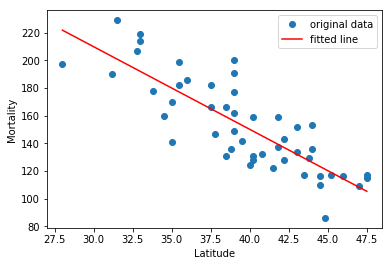

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

y = df['Mort']
x = df['Lat']

#data_x = [30, 35]
#data_y = [209.86, 141]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("p-values: %f" % (p_value))
print("r-squared: %f" % r_value**2)
  
#### Plot with label
labels = [r'$\mu_{Y} = E(Y)=\beta_{0}+\beta_{1} X$',
          r'$Y_{i}= \beta_{0}+\beta_{1} X+\varepsilon_{i}$']

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope * x, 'r', label='fitted line')

plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Mortality')
plt.show()

## Research Question

We can answer the research question using the P-value of the t-test for testing:

- the null hypothesis $H_{0} : \beta_{1}=0$
- against the alternative hypothesis $H_{\mathrm{A}} : \beta_{1} \neq 0$

the P-value of the t-test for "Lat" is less than 0.001. 

There is enough statistical evidence to conclude that the slope is not 0, that is, that there is a linear relationship between skin cancer mortality and latitude.

There is an alternative method for answering the research question, which uses the analysis of variance F-test. Let's first look at what we are working towards understanding

## Analysis of Variance

Below, there is a column labeled F, which contains the F-test statistic, and there is a column labeled P, which contains the P-value associated with the F-test

Notice that the P-value, 0.000, appears to be the same as the P-value, 0.000, for the t-test for the slope.

The F-test similarly tells us that there is enough statistical evidence to conclude that there is a linear relationship between skin cancer mortality and latitude.

In [ ]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='Mort ~ Lat', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mort   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     99.80
Date:                Sat, 27 Apr 2019   Prob (F-statistic):           3.31e-13
Time:                        12:10:53   Log-Likelihood:                -213.08
No. Observations:                  49   AIC:                             430.2
Df Residuals:                      47   BIC:                             433.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    389.1894     23.812     16.344      0.000     341.285     437.094
Lat           -5.9776      0.598     -9.990      0.000      -7.181      -4.774
==============================================================================
Omnibus:                        0.740   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.773
Skew:                           0.094   Prob(JB):                        0.679
Kurtosis:                       2.414   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

let's investigate the components of the Analysis of variance



### Sums of Squares

We considered sums of squares in lesson about [OLS](https://dynalist.io/d/Fm5tz2wS5-UilvDNXmLSOyv9) when we defined the coefficient of determination, 
r
2
, but now we consider them again in the context of the analysis of variance table.

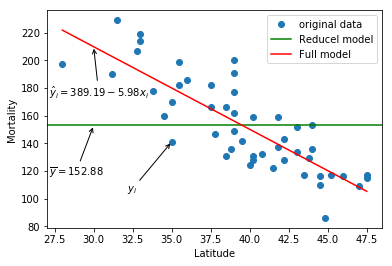

In [ ]:
interc = df['Mort'].mean()

data_x = [30, 35, 30]
data_y = [209.86, 141,interc
         ]

labels = [r'$\hat{y}_{i}=389.19-5.98 x_{i}$',
          r'$y_{i}$', r'$\overline{y}=152.88$'
         ]

plt.plot(x, y, 'o', label='original data')
plt.axhline(interc, label='Reducel model', color = 'g')
plt.plot(x, intercept + slope * x, 'r', label='Full model')


for label, x_1, y_2 in zip(labels, data_x, data_y):
  plt.annotate(label,
            xy=(x_1, y_2), xycoords='data',
            xytext=(-45, -50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Mortality')
plt.show()

The scatter plot of mortality and latitude appears again below, but now it is adorned with three labels:

- $y_{i}$ denotes the observed mortality for state i
- $\hat{y}_{i}$ is the estimated regression line (red line) and therefore denotes the estimated (or "fitted") mortality for the latitude of state i
- $\overline{y}$ represents what the line would look like if there were no relationship between mortality and latitude. That is, it denotes the "no relationship" line (green line). It is simply the average mortality of the sample.

If there is a linear relationship between mortality and latitude, then the estimated regression line should be "far" from the no relationship line. 

We just need a way of quantifying "far." The above three elements are useful in quantifying how far the estimated regression line is from the no relationship line. 

As illustrated by the plot, the two lines are quite far apart.

The distance of each observed value $y_i$ from the no regression line $y_{i}-\overline{y}$
. If you determine this distance for each data point, square each distance, and add up all of the squared distances, you get:

$$\sum_{i=1}^{n}\left(y_{i}-\overline{y}\right)^{2}=53637$$

In [ ]:
TSS = np.sum(np.power((y - interc), 2))
TSS

53637.265306122456

Called the "total sum of squares," it quantifies how much the observed responses vary if you don't take into account their latitude.

The distance of each fitted value $\hat{y}_{i}$ from the no regression line $\overline{y}$ is$\hat{y}_{i}-\overline{y}$. If you determine this distance for each data point, square each distance, and add up all of the squared distances, you get:

$\sum_{i=1}^{n}\left(\hat{y}_{i}-\overline{y}\right)^{2}=36464$

In [ ]:
y_hat  = intercept + slope * x
RSS = np.sum(np.power((y_hat - interc), 2))
RSS

36464.20020300047

Called the "regression sum of squares," it quantifies how far the estimated regression line is from the no relationship line.

The distance of each observed value $y_{i}$ from the estimated regression line $\hat{y}_{i}$ is $y_{i}-\hat{y}_{i}$ If you determine this distance for each data point, square each distance, and add up all of the squared distances, you get:

$$\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}=17173$$

In [ ]:
y_hat  = intercept + slope * x
ESS = np.sum(np.power((y - y_hat), 2))
ESS

17173.065103121957

Called the "error sum of squares," as you know, it quantifies how much the data points vary around the estimated regression line.

In short, we have illustrated that the total variation in observed mortality y (53637) is the sum of two parts — variation "due to" latitude (36464) and variation just due to random error (17173). 

We are careful to put "due to" in quotes in order to emphasize that a change in latitude does not necessarily cause the change in mortality. All we could conclude is that latitude is "associated with" mortality.

## Interpretation

Recall, we have 49 states in the data set:

- The degrees of freedom associated with SSR will always be 1 for the simple linear regression model. 
- The degrees of freedom associated with SSTO is n-1 = 49-1 = 48. 
- The degrees of freedom associated with SSE is n-2 = 49-2 = 47. And the degrees of freedom add up: 1 + 47 = 48.
- The sums of squares add up: SSTO = SSR + SSE. That is, here: 53637 = 36464 + 17173.

Let's tackle a few more columns of the analysis of variance table, namely the "mean square" column, labled MS, and the F-statistic column, labeled F

Although the derivation isn't as simple as it seems, the decomposition holds for the sum of the squared distances, too:
$$\sum_{i=1}^{n}\left(y_{i}-\overline{y}\right)^{2}=\sum_{i=1}^{n}\left(\hat{y}_{i}-\overline{y}\right)^{2}+\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}$$

SSTO = SSE+ SSR

![Variance_decomposition.png](https://dynalist.io/u/Ljf0NOwEdcOPrHaYUZ4KeLh9)

### Mean squares

We already know the "mean square error (MSE)" is defined as:

$$M S E=\frac{\sum\left(y_{i}-\hat{y}_{i}\right)^{2}}{n-2}=\frac{S S E}{n-2}$$

That is, we obtain the mean square error by dividing the error sum of squares by its associated degrees of freedom n-2

Similarly, we obtain the "regression mean square (MSR)" by dividing the regression sum of squares by its degrees of freedom 1:

$$M S R=\frac{\sum\left(\hat{y}_{i}-\overline{y}\right)^{2}}{1}=\frac{S S R}{1}$$

Of course, that means the regression sum of squares (SSR) and the regression mean square (MSR) are always identical for the simple linear regression model

Now, why do we care about mean squares? 

Because their expected values suggest how to test the null hypothesis $H_{0} : \beta_{1}=0$ against the alternative hypothesis $H_{\mathrm{A}} : \beta_{1} \neq 0$



### Expected Mean Squares

Imagine taking many, many random samples of size n from some population, and estimating the regression line and determining MSR and MSE for each data set obtained. It has been shown that the average (that is, the expected value) of all of the MSRs you can obtain equals

$$E(M S R)=\sigma^{2}+\beta_{1}^{2} \sum_{i=1}^{n}\left(X_{i}-\overline{X}\right)^{2}$$

Similarly, it has been shown that the average (that is, the expected value) of all of the MSEs you can obtain equals:

$$E(M S E)=\sigma^{2}$$

  These expected values suggest how to test $$H_{0} : \beta_{1}=0$$ versus $$H_{\mathrm{A}} : \beta_{1} \neq $$
  
- If $\beta_{1}=0$, then we'd expect the ratio MSR/MSE to equal 1.
- If $\beta_{1} \neq 0$, then we'd expect the ratio MSR/MSE to be greater than 1

These two facts suggest that we should use the ratio, MSR/MSE, to determine whether or not $\beta_{1} = 0$

Note that, because $\beta_1$ is squared in E(MSR), we cannot use the ratio MSR/MSE:

- to test $H_{0} : \beta_{1}=0$ versus $H_{\mathrm{A}} : \beta_{1}<0$
- or to test $\mathrm{H}_{0} : \beta_{1}=0$ versus $\mathrm{H}_{\mathrm{A}} : \beta_{1}>0$

We can only use MSR/MSE to test $H_{0} : \beta_{1}=0$ versus $H_{\mathrm{A}} : \beta_{1} \neq 0$

We have now completed our investigation of all of the entries of a standard analysis of variance table. The formula for each entry is summarized for you in the following analysis of variance table:

| Source of Variation | DF  | SS                                                              | MS                        | F                           |
|---------------------|-----|-----------------------------------------------------------------|---------------------------|-----------------------------|
| Regression          | 1   | $$S S R=\sum_{i=1}^{n}\left(\hat{y}_{i}-\overline{y}\right)^{2}$$ | $$M S R=\frac{S S R}{1}$$   | $$F^{*}=\frac{M S R}{M S E}$$ |
| Residual error      | n-2 | $$S S E=\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}$$        | $$M S E=\frac{S S E}{n-2}$$ |                             |
| Total               | n-1 | $$S S T O=\sum_{i=1}^{n}\left(y_{i}-\overline{y}\right)^{2}$$     |                           |                             |



## The formal F-test for the slope parameter $\beta_1$

The null hypothesis is $H_{0} : \beta_{1}=0$
The alternative hypothesis is  $H_{\mathrm{A}} : \beta_{1} \neq 0$
The test statistic is  $F^{*}=\frac{M S R}{M S E}$

As always, the P-value is obtained by answering the question: "What is the probability that we’d get an F* statistic as large as we did, if the null hypothesis is true?

The P-value is determined by comparing F* to an F distribution with 1 numerator degree of freedom and n-2 denominator degrees of freedom

## Example 

The following data set contains the winning times (in seconds) of the 22 men's 200 meter olympic sprints held between 1900 and 1996

Is there a linear relationship between year and the winning times? The plot of the estimated regression line sure makes it look so!



In [ ]:
range_name = 'mens200m.csv!A2:B23'
headers = ['Year', 'Men200']

df = service['sheet'].spreadsheets().values().get(
    spreadsheetId='1YVEf9PuU5NHcTqqF3qFrVXtmxWWnxuanmL2Xx9UQClo',
    range=range_name).execute()
df = pd.DataFrame(df.get('values', []), columns=headers)
df = df.apply(pd.to_numeric, errors='ignore')

slope: -0.028383    intercept: 76.153369
p-values: 0.000000
r-squared: 0.898847


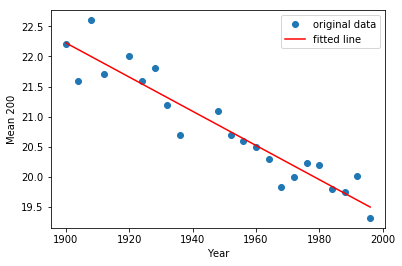

In [ ]:
y = df['Men200']
x = df['Year']

interc = df['Men200'].mean()

#data_x = [30, 35]
#data_y = [209.86, 141]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("p-values: %f" % (p_value))
print("r-squared: %f" % r_value**2)
  
#### Plot with label
labels = [r'$\mu_{Y} = E(Y)=\beta_{0}+\beta_{1} X$',
          r'$Y_{i}= \beta_{0}+\beta_{1} X+\varepsilon_{i}$']

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope * x, 'r', label='fitted line')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Mean 200')
plt.show()

To answer the research question, let's conduct the formal F-test of the null hypothesis $H_{0} : \beta_{1}=0$ against the alternative hypothesis $H_{\mathrm{A}} : \beta_{1} \neq 0$

### Analyse of Variance

From a scientific point of view, what we ultimately care about is the P-value.

That is, the P-value is less than 0.001. The P-value is very small. It is unlikely that we would have obtained such a large F* statistic if the null hypothesis were true. 

Therefore, we reject the null hypothesis $H_{0} : \beta_{1}=0$ in favor of the alternative hypothesis $H_{\mathrm{A}} : \beta_{1} \neq 0$.

There is sufficient evidence at the $\alpha=0.05$ level to conclude that there is a linear relationship between year and winning time

### Equivalence of the analysis of variance F-test and the t-test

As we noted in the first two examples, the P-value associated with the t-test is the same as the P-value associated with the analysis of variance F-test.

This will always be true for the simple linear regression model

The F-test is more useful for the multiple regression model when we want to test that more than one slope parameter is 0

In [ ]:
TSS = np.sum(np.power((y - interc), 2))
y_hat  = intercept + slope * x
RSS = np.sum(np.power((y_hat - interc), 2))
ESS = np.sum(np.power((y - y_hat), 2))
n = len(df)

ANOVA = {
    'Regression':{
        'DF': 1,
        'SS': RSS,
        'MS': RSS/1,
        'F': RSS/ (ESS/(n - 2)),
        'P': 0.000
    },
    'Residual_error':{
        'DF': n - 2,
        'SS': ESS,
        'MS': ESS/(n - 2)
    },
    'Total':{
        'DF': n - 1,
        'SS': TSS
    }
}
pd.DataFrame(ANOVA).T.fillna('')[['DF', 'SS', 'MS', 'F', 'P']]

,DF,SS,MS,F,P
Regression,1.0,15.796449,15.7964,177.72,0
Residual_error,20.0,1.777683,0.0888841,,
Total,21.0,17.574132,,,
